# Modeling the Binary Classification Data

## Import necessary libraries and import csv

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, plot_confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [85]:
df = pd.read_csv('OutputData/Cleaned_data2.csv')

## Define X and y variables, set up train test split, and create scaled data

In [86]:
y = df.status_group
X = df.drop('status_group', axis = 1)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [88]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

## Create function to evaluate all models

In [89]:
def evaluator(X_train, y_train, X_test, y_test, df, target, model):
    start = time.time()
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    end = time.time()
    print("Model Time: {}".format(end-start))
    class_report = classification_report(y_test, test_preds)
    print("Precision Score: {}".format(precision_score(y_test, test_preds, average = 'macro')))
    print("Recall Score: {}".format(recall_score(y_test, test_preds, average = 'macro')))
    print("Accuracy Score: {}".format(accuracy_score(y_test, test_preds )))
    print("F1 Score: {}".format(f1_score(y_test, test_preds, average = 'macro')))
    
    print('Mean Absolute Error:', mean_absolute_error(y_test, test_preds))  
    print('Mean Squared Error:', mean_squared_error(y_test, test_preds))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, test_preds)))
    
    print('Mean Model Cross-Val Score (k=3):')
    print(cross_val_score(model, df, target, cv=3).mean())
    
    model_confusion_matrix = plot_confusion_matrix(model, X_test, y_test)
    return model_confusion_matrix, class_report

## Run baseline model and run the other models

Model Time: 0.20381641387939453
Precision Score: 0.7280333073633817
Recall Score: 0.7060164987866546
Accuracy Score: 0.7230908386096395
F1 Score: 0.7081324677460736
Mean Absolute Error: 0.27690916139036054
Mean Squared Error: 0.27690916139036054
Root Mean Squared Error: 0.5262215896277542
Mean Model Cross-Val Score (k=3):
0.9930216329378926


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26350f9bba8>,
 '              precision    recall  f1-score   support\n\n           1       0.71      0.85      0.77      4339\n           2       0.74      0.57      0.64      3400\n\n    accuracy                           0.72      7739\n   macro avg       0.73      0.71      0.71      7739\nweighted avg       0.73      0.72      0.72      7739\n')

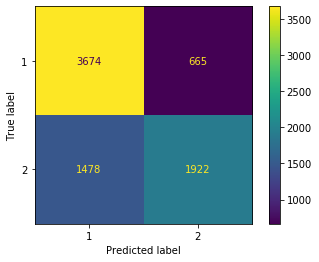

In [108]:
gb = GaussianNB()
evaluator(X_train, y_train, X_test, y_test, df, y, gb)

Model Time: 0.7744441032409668
Precision Score: 0.7864075617649637
Recall Score: 0.7860920447921045
Accuracy Score: 0.7895076883318258
F1 Score: 0.7862458636188957
Mean Absolute Error: 0.21049231166817417
Mean Squared Error: 0.21049231166817417
Root Mean Squared Error: 0.45879441111261826
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2635656b7f0>,
 '              precision    recall  f1-score   support\n\n           1       0.81      0.81      0.81      4339\n           2       0.76      0.76      0.76      3400\n\n    accuracy                           0.79      7739\n   macro avg       0.79      0.79      0.79      7739\nweighted avg       0.79      0.79      0.79      7739\n')

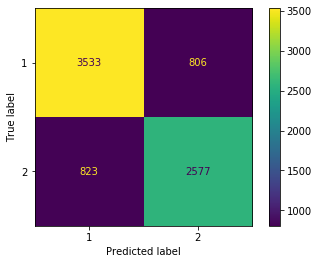

In [90]:
dt = DecisionTreeClassifier()
evaluator(X_train, y_train, X_test, y_test, df, y, dt)

Model Time: 2.3822391033172607
Precision Score: 0.7740454427269108
Recall Score: 0.7140470154413459
Accuracy Score: 0.7400180901925313
F1 Score: 0.7141763841278751
Mean Absolute Error: 0.25998190980746866
Mean Squared Error: 0.25998190980746866
Root Mean Squared Error: 0.5098842121574944
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26317c6f5f8>,
 '              precision    recall  f1-score   support\n\n           1       0.70      0.93      0.80      4339\n           2       0.84      0.50      0.63      3400\n\n    accuracy                           0.74      7739\n   macro avg       0.77      0.71      0.71      7739\nweighted avg       0.77      0.74      0.72      7739\n')

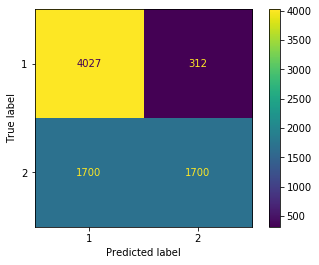

In [32]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(max_depth=5))

evaluator(X_train, y_train, X_test, y_test, df, y, bagged_tree)

Model Time: 1.6076197624206543
Precision Score: 0.8018455287555168
Recall Score: 0.7160818770928514
Accuracy Score: 0.7458327949347461
F1 Score: 0.7143290133294811
Mean Absolute Error: 0.2541672050652539
Mean Squared Error: 0.2541672050652539
Root Mean Squared Error: 0.5041499827087709
Mean Model Cross-Val Score (k=3):
0.9849577421105683


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26317d7d6d8>,
 '              precision    recall  f1-score   support\n\n           1       0.70      0.96      0.81      4339\n           2       0.91      0.47      0.62      3400\n\n    accuracy                           0.75      7739\n   macro avg       0.80      0.72      0.71      7739\nweighted avg       0.79      0.75      0.73      7739\n')

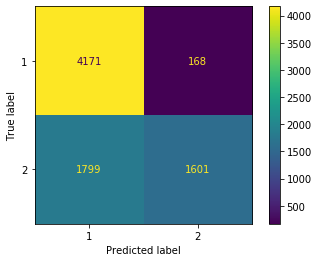

In [33]:
forest = RandomForestClassifier(max_depth= 5)
evaluator(X_train, y_train, X_test, y_test, df, y, forest)

Model Time: 3.9822897911071777
Precision Score: 0.7779373844531674
Recall Score: 0.7616542168838035
Accuracy Score: 0.7741310246801912
F1 Score: 0.7651795379194223
Mean Absolute Error: 0.22586897531980876
Mean Squared Error: 0.22586897531980876
Root Mean Squared Error: 0.475256746737812
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26317d87a20>,
 '              precision    recall  f1-score   support\n\n           1       0.76      0.86      0.81      4339\n           2       0.79      0.66      0.72      3400\n\n    accuracy                           0.77      7739\n   macro avg       0.78      0.76      0.77      7739\nweighted avg       0.78      0.77      0.77      7739\n')

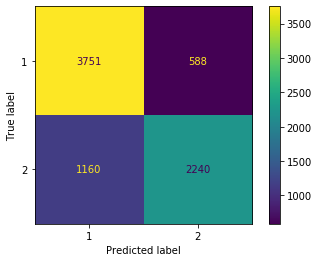

In [34]:
adaboost_clf = AdaBoostClassifier()
evaluator(X_train, y_train, X_test, y_test, df, y, adaboost_clf)

Model Time: 10.956153869628906
Precision Score: 0.7921001300867118
Recall Score: 0.7698907311253609
Accuracy Score: 0.7840806305724254
F1 Score: 0.7740832183342025
Mean Absolute Error: 0.21591936942757461
Mean Squared Error: 0.21591936942757461
Root Mean Squared Error: 0.46467124876365506
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26319a8bcf8>,
 '              precision    recall  f1-score   support\n\n           1       0.77      0.89      0.82      4339\n           2       0.82      0.65      0.73      3400\n\n    accuracy                           0.78      7739\n   macro avg       0.79      0.77      0.77      7739\nweighted avg       0.79      0.78      0.78      7739\n')

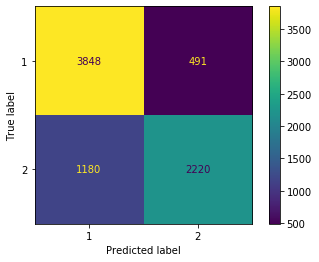

In [35]:
gbt_clf = GradientBoostingClassifier()
evaluator(X_train, y_train, X_test, y_test, df, y, gbt_clf)

Model Time: 50.62648558616638
Precision Score: 0.7991147333734017
Recall Score: 0.7934923674470941
Accuracy Score: 0.8002325881896886
F1 Score: 0.7955189181968617
Mean Absolute Error: 0.1997674118103114
Mean Squared Error: 0.1997674118103114
Root Mean Squared Error: 0.4469534783512837
Mean Model Cross-Val Score (k=3):
0.687705151068724


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x263184e7cf8>,
 '              precision    recall  f1-score   support\n\n           1       0.81      0.85      0.83      4339\n           2       0.79      0.74      0.76      3400\n\n    accuracy                           0.80      7739\n   macro avg       0.80      0.79      0.80      7739\nweighted avg       0.80      0.80      0.80      7739\n')

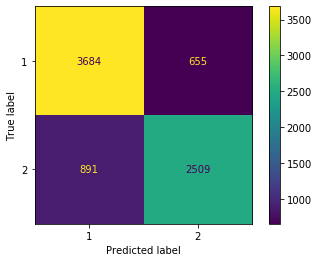

In [36]:
knn = KNeighborsClassifier()

evaluator(scaled_train, y_train, scaled_test, y_test, df, y, knn) #Use scaled data for knn

Model Time: 8.159569501876831
Precision Score: 0.7912353209482549
Recall Score: 0.7657445806162981
Accuracy Score: 0.781108670370849
F1 Score: 0.77002462217694
Mean Absolute Error: 0.21889132962915106
Mean Squared Error: 0.21889132962915106
Root Mean Squared Error: 0.4678582366798206
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2631a0b7dd8>,
 '              precision    recall  f1-score   support\n\n           1       0.76      0.89      0.82      4339\n           2       0.82      0.64      0.72      3400\n\n    accuracy                           0.78      7739\n   macro avg       0.79      0.77      0.77      7739\nweighted avg       0.79      0.78      0.78      7739\n')

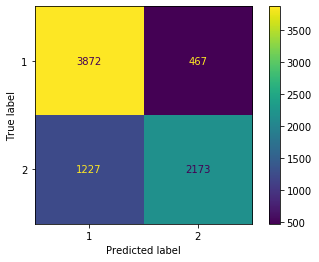

In [37]:
clf = xgb.XGBClassifier()
evaluator(scaled_train, y_train, scaled_test, y_test, df, y, clf)

## Tune best models - decision tree and knn

In [99]:
dt_params = { 
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15,],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2,5,10]
}

In [105]:
dt_grid_search = GridSearchCV(dt, dt_params, cv=3, return_train_score=True, scoring = 'accuracy')


Model Time: 81.33730220794678
Precision Score: 0.7888449502398378
Recall Score: 0.7736011279367705
Accuracy Score: 0.7852435715208683
F1 Score: 0.7772165040592952
Mean Absolute Error: 0.21475642847913168
Mean Squared Error: 0.21475642847913168
Root Mean Squared Error: 0.4634182004185115
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2631909c470>,
 '              precision    recall  f1-score   support\n\n           1       0.77      0.87      0.82      4339\n           2       0.80      0.68      0.73      3400\n\n    accuracy                           0.79      7739\n   macro avg       0.79      0.77      0.78      7739\nweighted avg       0.79      0.79      0.78      7739\n')

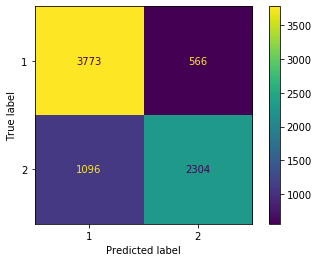

In [106]:
evaluator(X_train, y_train, X_test, y_test, df, y, dt_grid_search)

In [96]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [54]:
knn_params ={
    'n_neighbors': [3,5,7,9],
    'p': [1,2,3],
    'weights': ['uniform', 'distance']
}

Model Time: 53193.31225037575
Precision Score: 0.8124097838944715
Recall Score: 0.8075573797161177
Accuracy Score: 0.8135418012663135
F1 Score: 0.8094061015056854
Mean Absolute Error: 0.18645819873368652
Mean Squared Error: 0.18645819873368652
Root Mean Squared Error: 0.43180805774520525
Mean Model Cross-Val Score (k=3):
0.7491147812152698


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26318fb7e10>,
 '              precision    recall  f1-score   support\n\n           1       0.82      0.86      0.84      4339\n           2       0.81      0.76      0.78      3400\n\n    accuracy                           0.81      7739\n   macro avg       0.81      0.81      0.81      7739\nweighted avg       0.81      0.81      0.81      7739\n')

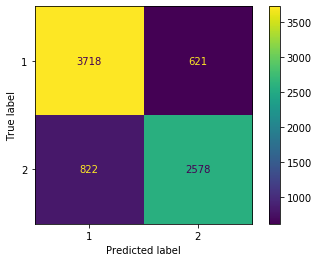

In [55]:
knn_grid_search = GridSearchCV(knn, knn_params, cv=3, return_train_score=True)
evaluator(scaled_train, y_train, scaled_test, y_test, df, y, knn_grid_search)

In [56]:
knn_grid_search.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

## Finalize final two best models

### Best KNN model


Model Time: 42.218098402023315
Precision Score: 0.8082550101326977
Recall Score: 0.8029272128302808
Accuracy Score: 0.809277684455356
F1 Score: 0.8049019587749304
Mean Absolute Error: 0.190722315544644
Mean Squared Error: 0.190722315544644
Root Mean Squared Error: 0.43671766113204535
Mean Model Cross-Val Score (k=3):
0.7469437336848362


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26350e64f28>,
 '              precision    recall  f1-score   support\n\n           1       0.81      0.86      0.83      4339\n           2       0.80      0.75      0.78      3400\n\n    accuracy                           0.81      7739\n   macro avg       0.81      0.80      0.80      7739\nweighted avg       0.81      0.81      0.81      7739\n')

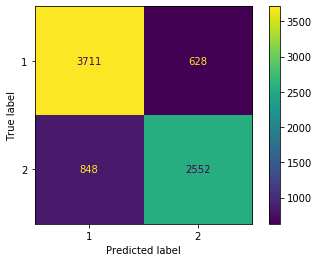

In [126]:
knnBest =  KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

evaluator(scaled_train, y_train, scaled_test, y_test, df, y, knnBest)

### Best DT Model

Model Time: 0.6601238250732422
Precision Score: 0.7902741459154872
Recall Score: 0.7861569147133387
Accuracy Score: 0.792221217211526
F1 Score: 0.7877357023008846
Mean Absolute Error: 0.20777878278847398
Mean Squared Error: 0.20777878278847398
Root Mean Squared Error: 0.4558275801094905
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26350f60860>,
 '              precision    recall  f1-score   support\n\n           1       0.80      0.84      0.82      4339\n           2       0.78      0.74      0.76      3400\n\n    accuracy                           0.79      7739\n   macro avg       0.79      0.79      0.79      7739\nweighted avg       0.79      0.79      0.79      7739\n')

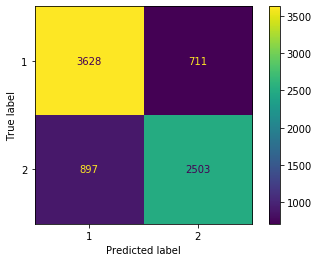

In [107]:
dtBest = DecisionTreeClassifier(criterion= 'gini',
 max_depth= None,
 min_samples_leaf= 10,
 min_samples_split= 5)
evaluator(X_train, y_train, X_test, y_test, df, y, dtBest)

## View Feature Importance

In [83]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,25))
    plt.barh(range(n_features), model.feature_importances_) 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Binary Decision Tree')

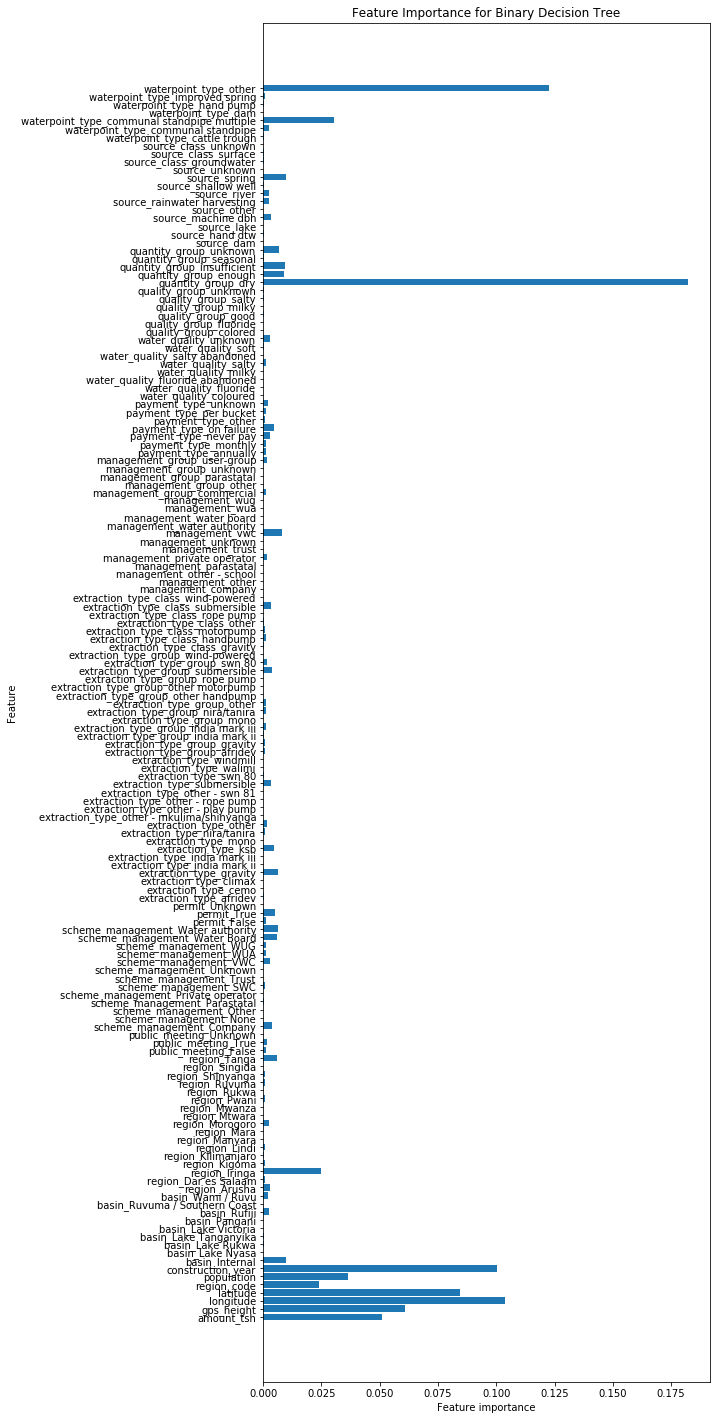

In [125]:
plot_feature_importances(dtBest)